# Lab 11 Pratik Patel

This lab will be a warm-up for your course project. You are asked to identify an indetersing data set and perform data collection and cleaning, exploratory data analysis, and supervised learning. You should produce a 3-page report explaining the data, what kind of analysis you performed, and showing and dicussing the main results.

**Data Selection.** For this assignment, you are not allowed to use any of the data sets you used in the previous assignments. The following is a list of pointers to interesting data sets. Please explore those links and see if there is anything that captures your imagination. You should also feel free to use Google search and find some other sources of data. You should also feel free to crawl data from internet of from deep web. Some pointers:
- Kaggle data sets: https://www.kaggle.com/datasets
- UCI Irvine Data Repository: http://archive.ics.uci.edu/ml/, http://kdd.ics.uci.edu/
- Links from Wikipedia: https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research
- More links: https://www.dataquest.io/blog/free-datasets-for-projects/
- More links: http://www.kdnuggets.com/datasets/index.html
- More links: https://blog.bigml.com/list-of-public-data-sources-fit-for-machine-learning/
- More links: https://www.analyticsvidhya.com/blog/2016/11/25-websites-to-find-datasets-for-data-science-projects/

**Data Analysis objective**. Regardless of which data set you select, you will have to perform exploratory data analysis (EDA) to get a deep insight into the data properties and also train a predictor for either classification or regression (it is up to you to decide what exactly you want to predict). It is up to you do decide how to perform EDA and how to define your supervised learning problem.

**Deliverables**: 
1. the ipynb file containing all the code you used to produce your results
2. A 3 page report containing the following:
 - Title and your name
 - Introduction: Explain in a few paragraphs why you selected your data set and what are your data analysis objectives
 - Methodology: Explain in detail what kind of EDA analysis you performed on your data. Explain the details of your supervised learning experiment (how you processed the data, what are the attributes, what kind of prediction model you used, and how did you evaluate its accuracy)
 - Results: a summary of your EDA results (show at least a few figures/tables providing a data insight, provide discussion of your insights) and a summary of your supervised learning results (explain the choice of hyperparameters, show the accuracies for different choices of hyperparameters and learning algorithms, and discuss how happy you are with the results)
 - Conclusion: a few sentences summarizing your study
 - References and Acknowledgements: pointers to any web source you used to finisch your assignment and acknowledging any help you obtained 

**Grading**. To get 100 points, you will have to provide a nicely commented code and a well-written report reflecting that you put a decent effort in this assignment (an equivalent of 6-10 hours of work). In this project, you can earn up to 100 EXTRA POINTS if you put a special effort, by selecting a challenging or large data set that required extra effort in data collection, data cleaning, data preprocessing, EDA, supervised learning, or if your project report and documentation is particularly well done.

# Wine Quality and Type

- link to dataset http://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [4]:
# imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.metrics import confusion_matrix
from pandas import crosstab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
%matplotlib inline

In [5]:
# Creating data frame from cvs file for red wine
dataRed = pd.read_csv("winequality-red.csv", delimiter=';')
cols = ["fixed acidity" ,"volatile acidity","citric acid", "residual sugar", "chlorides", 
       "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality" ]
#dataRed.columns = cols
dataRed.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
# Creating data frame from csv file for white wine
dataWhite= pd.read_csv("winequality-white.csv", delimiter=';')
dataWhite.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [7]:
# Creates correlation coefficient matrix for white wine
dataWhite.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [8]:
print("WHITE WINE")
cor_matrix = dataWhite.corr()
# Finds correlation coefficient of features above a threshold
k=12
for i in range(0,12):
    for j in range (i+1,k):
        if abs(cor_matrix.iloc[i,j]) > 0.4:
            print("Attributes %s and %s have a correlational coefficient of %f"
                  %(cols[i],cols[j],abs(cor_matrix.iloc[i,j])))
            #print("Cols are",col[i],col[j])
    k=k-1;


WHITE WINE
Attributes fixed acidity and pH have a correlational coefficient of 0.425858
Attributes residual sugar and total sulfur dioxide have a correlational coefficient of 0.401439
Attributes residual sugar and density have a correlational coefficient of 0.838966
Attributes free sulfur dioxide and total sulfur dioxide have a correlational coefficient of 0.615501


In [9]:
# Creates correlation coefficient matrix for red wine
dataRed.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [10]:
print("RED WINE")
cor_matrix = dataRed.corr()
# Finds correlation coefficient of features above a threshold
k=12
for i in range(0,12):
    for j in range (i+1,k):
        if abs(cor_matrix.iloc[i,j]) > 0.4:
            print("Attributes %s and %s have a correlational coefficient of %f"
                  %(cols[i],cols[j],abs(cor_matrix.iloc[i,j])))
            #print("Cols are",col[i],col[j])
    k=k-1;


RED WINE
Attributes fixed acidity and citric acid have a correlational coefficient of 0.671703
Attributes fixed acidity and density have a correlational coefficient of 0.668047
Attributes fixed acidity and pH have a correlational coefficient of 0.682978
Attributes volatile acidity and citric acid have a correlational coefficient of 0.552496
Attributes citric acid and pH have a correlational coefficient of 0.541904
Attributes free sulfur dioxide and total sulfur dioxide have a correlational coefficient of 0.667666


Text(0.5,1,'Count for Each Quality Group')

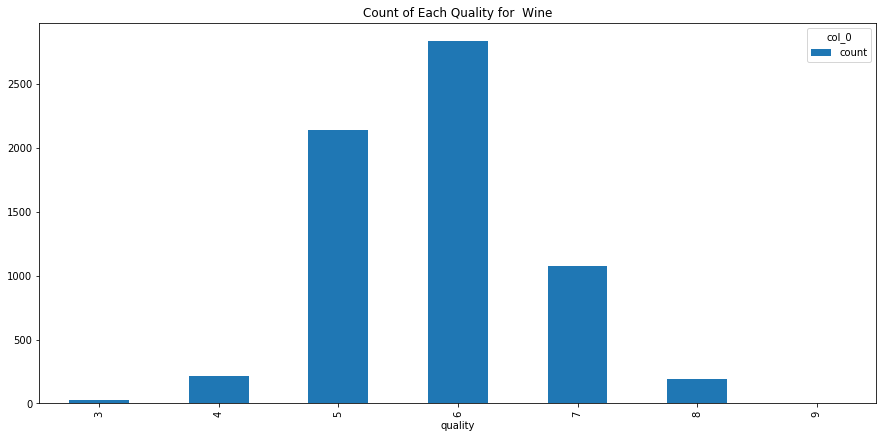

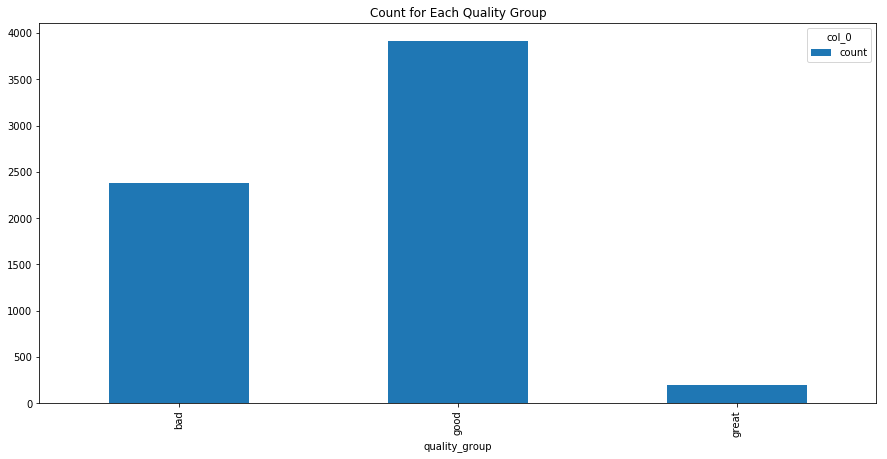

In [42]:
dataRed['wine_type'] = 'red'   # add a column for the type of wine so red
dataWhite['wine_type'] = 'white' # add a column for the type of wine so white
frame=[dataRed,dataWhite]

Alldata=pd.concat(frame) # combine both red & white tables

#This will add a column to create grouping
Alldata['quality_group'] = Alldata['quality'].apply(lambda value: 'bad' if value <= 5 else 'good' if value <= 7 else 'great')

#Plot the count for the quality
cWR = pd.crosstab(index=Alldata["quality"],columns="count")
cWR.plot.bar(figsize=(15,7))
plt.title("Count of Each Quality for  Wine");

#Plot the count for the quality grouing
cWR = pd.crosstab(index=Alldata["quality_group"],columns="count")
cWR.plot.bar(figsize=(15,7))
plt.title("Count for Each Quality Group")

In [12]:
#Shuffles the dataset
Alldata = Alldata.sample(frac=1, random_state=42).reset_index(drop=True)
Alldata.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_group
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,great
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,bad
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,good
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,good
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,good
5,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6,red,good
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,white,bad
7,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,white,good
8,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5,red,bad
9,7.1,0.23,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.3,7,white,good


# Predicting Wine Type Through Clustering

In [43]:
#Get all the data except last 3 columns aka quality, wine_type, and quality group
hold=Alldata.iloc[:,:-3]

# Scale the hold set
scaler = StandardScaler().fit(hold)
hold = scaler.transform(hold)
print (hold.shape)

#Perform svd to get better matrix for clustering
U,s,V = np.linalg.svd(hold,full_matrices=0)
k = 2
dsvd = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
dsvd = dsvd[:, 0:2]

(6497, 11)


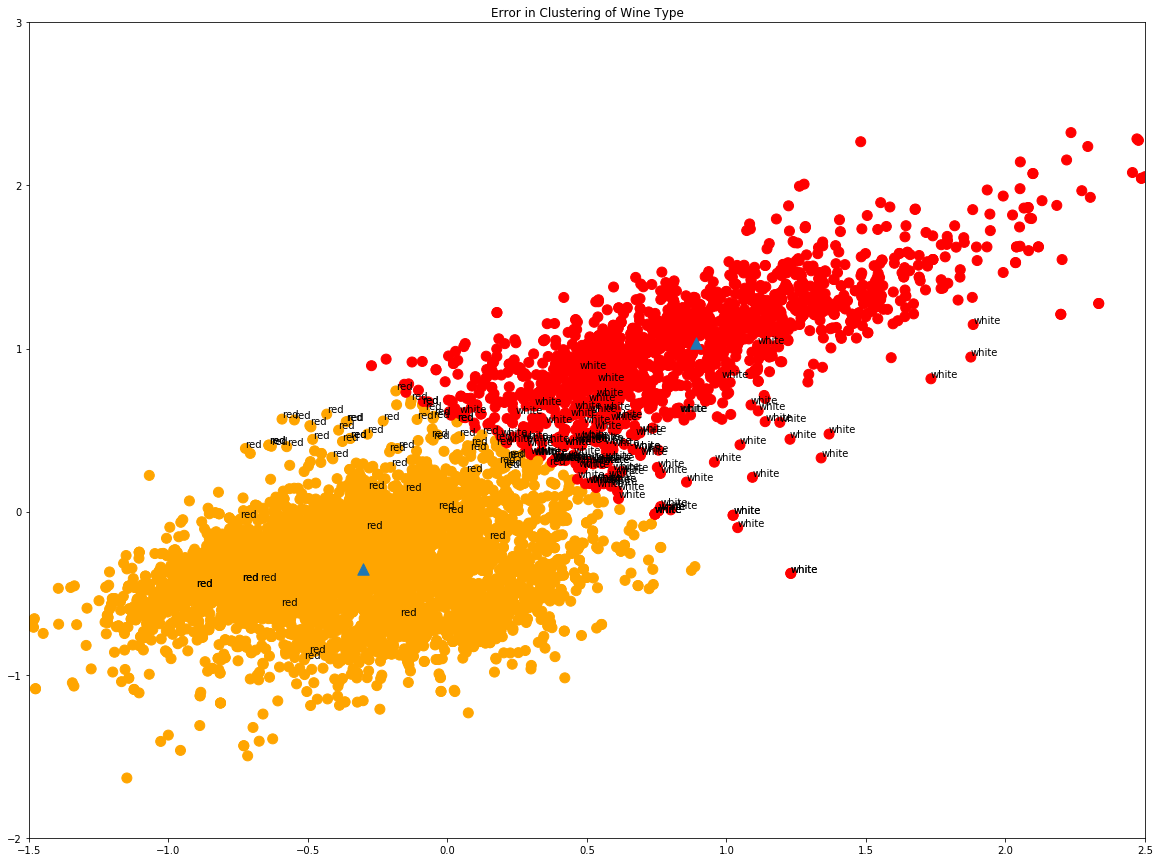

In [44]:
#Create a KMeans model and fit data to see if clustered created are types of wine
kmeans = KMeans(n_clusters=2, random_state=0).fit(dsvd)
# cl are the assignments of points to one of the 2 clusters
cl=kmeans.labels_
# cen are the centers of the 2 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['orange','red']
plt.figure(figsize=(20,15))
plt.axis([-1.5,2.5,-2,3])
plt.scatter(dsvd[:,0],dsvd[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")

#Finds all the points that belong to a cluster but is not "right" type 
wrong=[]
for i in range(0,6497):
    if(cl[i]==1):
        if(Alldata.iloc[i,12]=="white"):
            wrong.append(i)
    else:
        if(Alldata.iloc[i,12]=="red"):
            wrong.append(i)
#plots the correct label for the points wrongly clusterd            
for i in wrong:
    if((-1.5<=dsvd[i,0]<=2.5) and(-2<=dsvd[i,1]<=3)):
        plt.text(dsvd[i,0],dsvd[i,1]+0.01,s=str(Alldata.iloc[i,12]),size=10)
plt.title("Error in Clustering of Wine Type");
#plt.axis([-1.5,2.5,-2,3])

# Predictiong Wine Type Through Supervised Learning

In [132]:
# Preparing TO PREDICT WINE TYPE

# Remove last three columns as they are result to be predicted from data set
X = Alldata.iloc[:,:-3]
#Set y to wine type
y = np.array(Alldata['wine_type'])  

features=X.columns


In [133]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
from collections import Counter
print(Counter(y_train), Counter(y_test))
print('Features:', list(features))

#Scaling the data set 
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)


Counter({'white': 3298, 'red': 1054}) Counter({'white': 1600, 'red': 545})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [134]:
# list of prediction algorithms
names = ["Logistic Regression","Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

# Prediction algorithms correspoding code
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]

# Trains, tests testing data, checks accuracy and confusion matrix
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print (name, "accuracy:", score)
    pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, pred)
    print ("The confusion matrix for ",name)
    print (cnf_matrix)
    print()

Logistic Regression accuracy: 0.9948717948717949
The confusion matrix for  Logistic Regression
[[ 541    4]
 [   7 1593]]

Nearest Neighbors accuracy: 0.993006993006993
The confusion matrix for  Nearest Neighbors
[[ 538    7]
 [   8 1592]]

Linear SVM accuracy: 0.9944055944055944
The confusion matrix for  Linear SVM
[[ 540    5]
 [   7 1593]]

RBF SVM accuracy: 0.9020979020979021
The confusion matrix for  RBF SVM
[[ 335  210]
 [   0 1600]]

Decision Tree accuracy: 0.9836829836829837
The confusion matrix for  Decision Tree
[[ 523   22]
 [  13 1587]]

Random Forest accuracy: 0.9836829836829837
The confusion matrix for  Random Forest
[[ 514   31]
 [   4 1596]]

Neural Net accuracy: 0.9958041958041958
The confusion matrix for  Neural Net
[[ 541    4]
 [   5 1595]]

AdaBoost accuracy: 0.9972027972027973
The confusion matrix for  AdaBoost
[[ 539    6]
 [   0 1600]]



In [136]:
le = LabelEncoder()
le.fit(y_train)
# encode wine type labels so change from string label to numerical
y_trainEncoded = le.transform(y_train)
y_testEncoded = le.transform(y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 32)                384       
_________________________________________________________________
dense_115 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_116 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 33        
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________
Train on 4352 samples, validate on 2145 samples
Epoch 1/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.1564 - acc: 0.9637 - val_loss: 0.0426 - val_acc: 0.9921
Epoch 2/5
4352/4352 [==============================] - 4s 902us/step - loss: 0.0426 - acc: 

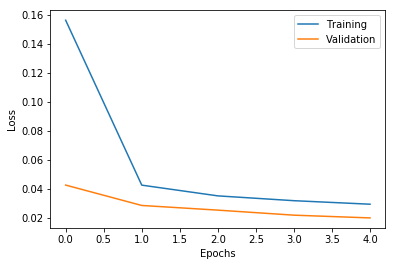

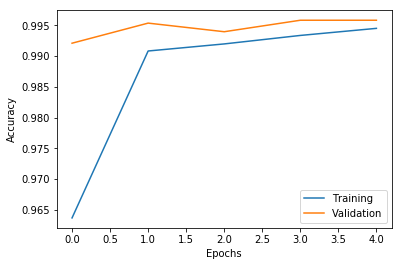

In [137]:
#Create a Deep Neural Network with 32 filters and in end classfying a type of wine red or white
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer="sgd", metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, y_trainEncoded, batch_size=5, 
                 epochs=5, verbose=1, validation_data=(X_test, y_testEncoded))


import matplotlib.pyplot as plt
%matplotlib inline
#Plots the Loss and Accuracy of NN for each epoch
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, y_testEncoded, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Predicting the Qualitly

In [138]:
# Preparing TO PREDICT WINE Quality

# Remove last three columns as they are result to be predicted from data set
X = Alldata.iloc[:,:-3]
#We will use the grouping so that it classfies data into 3 types bad, good, great
y = np.array(Alldata['quality_group'])  

features=X.columns
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)
from collections import Counter
print(Counter(y_train), Counter(y_test))
print('Features:', list(features))

#Scaling the data set 
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)



Counter({'good': 2962, 'bad': 1767, 'great': 143}) Counter({'good': 953, 'bad': 617, 'great': 55})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [139]:
#Convert string value to numerical categories
le = LabelEncoder()
le.fit(y_train)
# encode wine group labels
y_trainEncoded = le.transform(y_train)
y_testEncoded = le.transform(y_test)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 32)                384       
_________________________________________________________________
dense_119 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_120 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_121 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_122 (Dense)            (None, 3)                 99        
_________________________________________________________________
activation_11 (Activation)   (None, 3)                 0         
Total params: 3,651
Trainable params: 3,651
Non-trainable params: 0
_________________________________________________________________
Train on

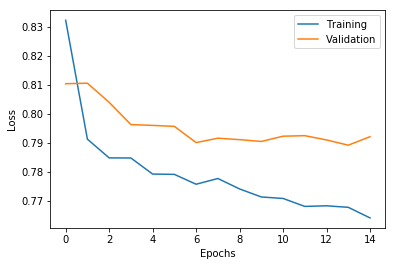

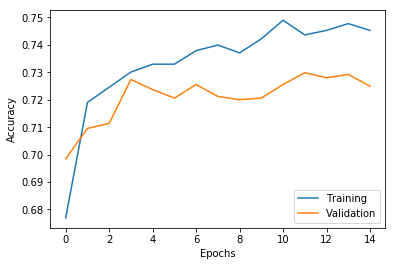

In [140]:
#Create a Deep Neural Network with 32 filters and in end classfying into 3 type bad, good, great
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.add(Activation('softmax'))

from keras.utils import to_categorical
y_trainEncoded = to_categorical(y_trainEncoded)
y_testEncoded = to_categorical(y_testEncoded)

#using categorical corssentrophy as now 3 categories
model.compile(loss='categorical_crossentropy', 
              optimizer="adam", metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, y_trainEncoded, batch_size=5, 
                 epochs=15, verbose=1, validation_data=(X_test, y_testEncoded))

import matplotlib.pyplot as plt
%matplotlib inline
#Plots the Loss and Accuracy of NN for each epoch
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, y_testEncoded, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

In [141]:
# list of prediction algorithms
names = ["Logistic Regression","Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

# Prediction algorithms correspoding code
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]

# Trains, tests testing data, checks accuracy and confusion matrix
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print (name, "accuracy:", score)
    pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, pred)
    print ("The confusion matrix for ",name)
    print (cnf_matrix)
    print()

Logistic Regression accuracy: 0.7175384615384616
The confusion matrix for  Logistic Regression
[[358 259   0]
 [145 808   0]
 [  1  54   0]]

Nearest Neighbors accuracy: 0.7009230769230769
The confusion matrix for  Nearest Neighbors
[[388 227   2]
 [192 743  18]
 [  3  44   8]]

Linear SVM accuracy: 0.7156923076923077
The confusion matrix for  Linear SVM
[[340 277   0]
 [130 823   0]
 [  0  55   0]]

RBF SVM accuracy: 0.7409230769230769
The confusion matrix for  RBF SVM
[[297 320   0]
 [ 56 897   0]
 [  0  45  10]]

Decision Tree accuracy: 0.6984615384615385
The confusion matrix for  Decision Tree
[[357 260   0]
 [174 777   2]
 [  2  52   1]]

Random Forest accuracy: 0.7033846153846154
The confusion matrix for  Random Forest
[[280 337   0]
 [ 90 863   0]
 [  0  55   0]]

Neural Net accuracy: 0.7458461538461538
The confusion matrix for  Neural Net
[[387 230   0]
 [128 825   0]
 [  0  55   0]]

AdaBoost accuracy: 0.6898461538461539
The confusion matrix for  AdaBoost
[[381 235   1]
 [199 